In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

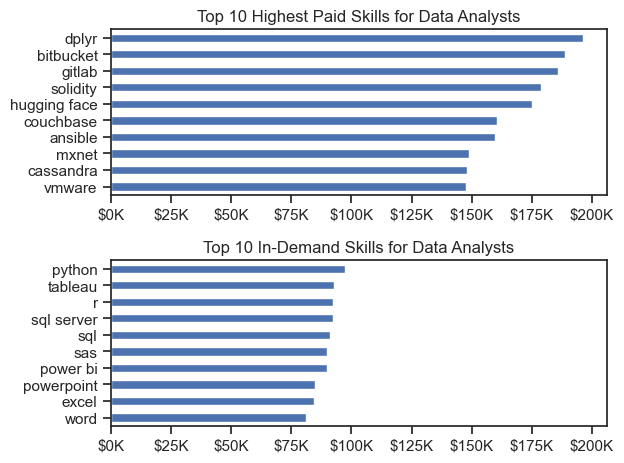

In [8]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group =  df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_US_top_pay = df_DA_US_group.sort_values(by='median', ascending = False).head(10)

df_DA_US_skills = df_DA_US_group.sort_values(by='count', ascending= False).head(10).sort_values(by='median', ascending = False)

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group =  df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_US_top_pay = df_DA_US_group.sort_values(by='median', ascending = False).head(10)

df_DA_US_skills = df_DA_US_group.sort_values(by='count', ascending= False).head(10).sort_values(by='median', ascending = False)

fig, ax = plt.subplots(2,1)

df_DA_US_top_pay[::-1].plot(kind='barh', y = 'median', ax =ax[0])
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()

df_DA_US_skills[::-1].plot(kind='barh', y = 'median', ax =ax[1])
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()

fig.tight_layout()
plt.show()


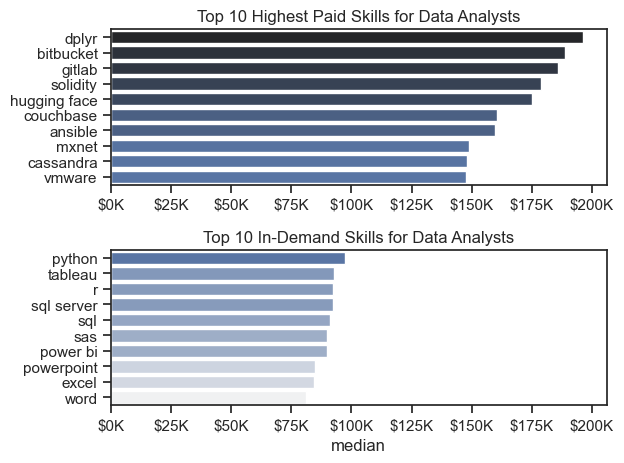

In [ ]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group =  df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_US_top_pay = df_DA_US_group.sort_values(by='median', ascending = False).head(10)

df_DA_US_skills = df_DA_US_group.sort_values(by='count', ascending= False).head(10).sort_values(by='median', ascending = False)

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group =  df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_US_top_pay = df_DA_US_group.sort_values(by='median', ascending = False).head(10)

df_DA_US_skills = df_DA_US_group.sort_values(by='count', ascending= False).head(10).sort_values(by='median', ascending = False)

fig, ax = plt.subplots(2,1)

sns.barplot(data = df_DA_US_top_pay, x= 'median', y=df_DA_US_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
sns.set_theme(style="ticks")
ax[0].legend().remove()

# df_DA_US_top_pay[::-1].plot(kind='barh', y = 'median', ax =ax[0])
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].set_xlabel("")

sns.barplot(data = df_DA_US_skills, x= 'median', y=df_DA_US_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
s
# df_DA_US_skills[::-1].plot(kind='barh', y = 'median', ax =ax[1])
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()

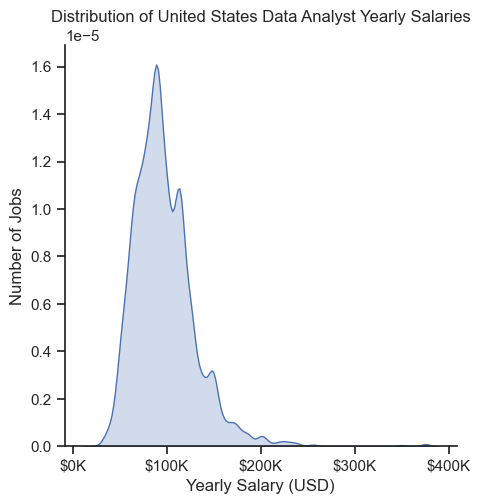

In [10]:
sns.displot(data= df_DA_US['salary_year_avg'], kind='kde', fill=True)

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

/var/folders/5_/9lw3m84x5cjb1rwb2dzp8j2c0000gn/T/ipykernel_2528/2392691960.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


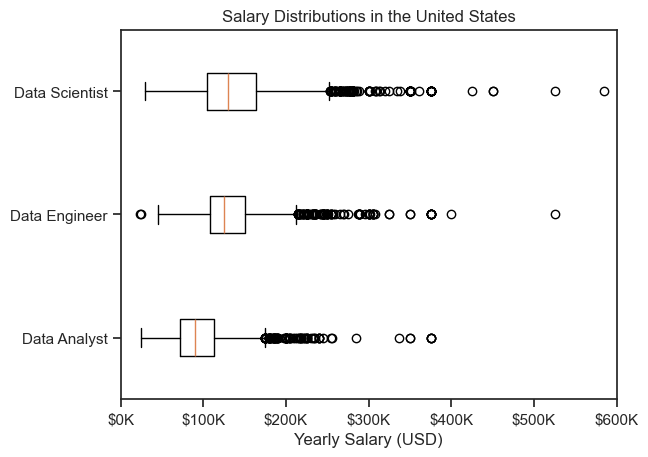

In [11]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


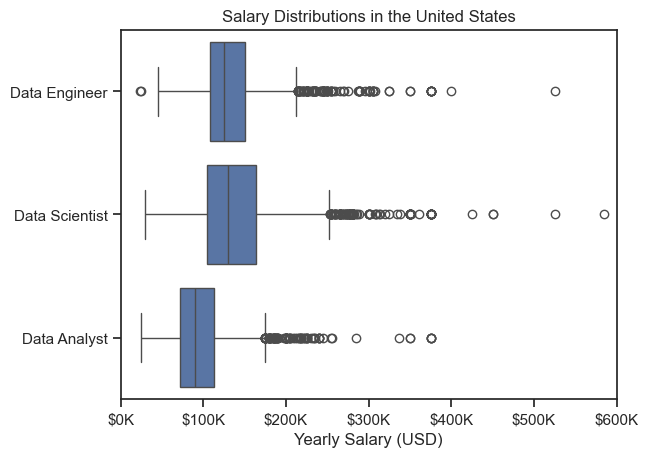

In [14]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()